In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.neighbors import KNeighborsClassifier 

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

import seaborn as sns
sns.set(style="ticks")

In [2]:
data = pd.read_csv('Iris.csv');
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
lb_make = LabelEncoder()
data["Species_Code"] = lb_make.fit_transform(data["Species"])

In [4]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Code
119,120,6.0,2.2,5.0,1.5,Iris-virginica,2
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
64,65,5.6,2.9,3.6,1.3,Iris-versicolor,1
131,132,7.9,3.8,6.4,2.0,Iris-virginica,2
83,84,6.0,2.7,5.1,1.6,Iris-versicolor,1
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,1
124,125,6.7,3.3,5.7,2.1,Iris-virginica,2
16,17,5.4,3.9,1.3,0.4,Iris-setosa,0
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,1


In [5]:
X = data[data.columns[1:-2]] # ไม่เอา 1 คอลัมแรก และ 2 คอลัมท้าย
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#X.iloc[:,2]

In [7]:
y = data[['Species_Code']]
y.head()

,Species_Code
0,0
1,0
2,0
3,0
4,0


In [29]:
#kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Text(0.5,0,'Petal length')

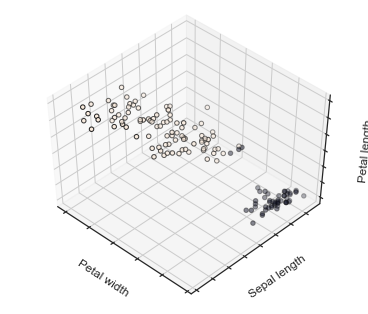

In [31]:
fignum = 1
fig = plt.figure(fignum, figsize=(5, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

### K

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Accuracy :  0.24


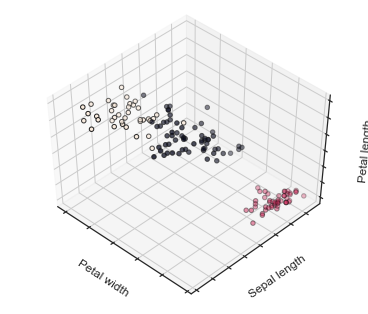

In [32]:
kmeans = KMeans(n_clusters=3, n_init=20)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)
fig = plt.figure(fignum, figsize=(5, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2],
               c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

print('Accuracy : ',accuracy_score(labels,y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Accuracy :  0.24


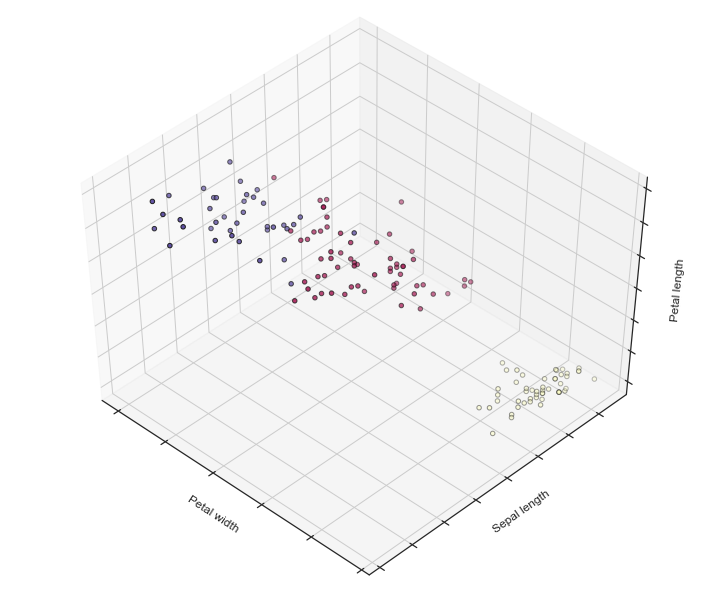

In [27]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)
fig = plt.figure(fignum, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2],
               c=labels.astype(np.float), edgecolor='k',cmap='Spectral')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

print('Accuracy : ',accuracy_score(labels,y))

In [16]:
y_compare = y.copy()
y_compare['Predict'] = labels
y_compare.sample(10)


,Species_Code,Predict
60,1,0
6,0,1
138,2,0
35,0,1
147,2,2
122,2,2
48,0,1
9,0,1
136,2,2
85,1,0


In [18]:
silhouette_avg = silhouette_score(X, labels)
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5525919445499757


### K = 4

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy :  0.02
For n_clusters = 2 The average silhouette_score is : 0.6808136202936816


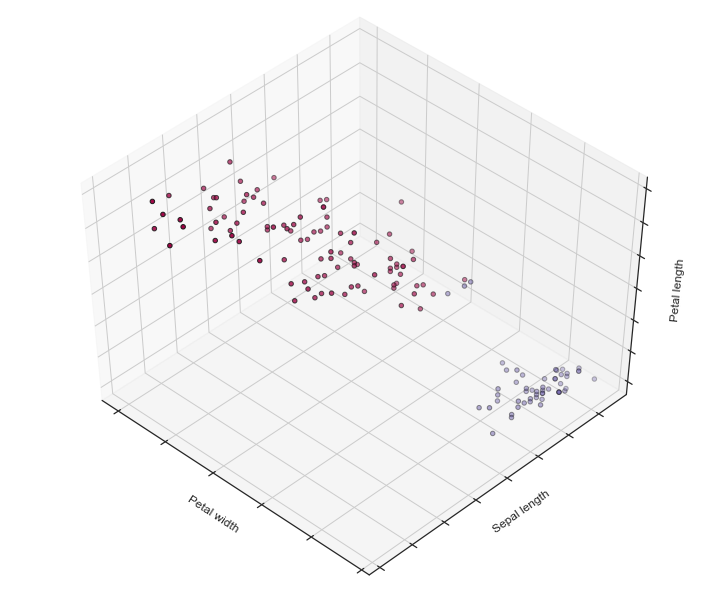

In [33]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)
fig = plt.figure(fignum, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2],
               c=labels.astype(np.float), edgecolor='k',cmap='Spectral')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

print('Accuracy : ',accuracy_score(labels,y))
silhouette_avg = silhouette_score(X, labels)
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)